In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
%matplotlib inline

Using TensorFlow backend.


In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
train.columns[2:]

Index(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror',
       'Music', 'Musical', 'Mystery', 'N/A', 'News', 'Reality-TV', 'Romance',
       'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War', 'Western'],
      dtype='object')

In [4]:
train_image = []
for i in tqdm(range(train.shape[0])):
    img = image.load_img('Images/'+train['Id'][i]+'.jpg',target_size=(300,300,3))
    img = image.img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)

100%|██████████| 7254/7254 [00:16<00:00, 447.15it/s]


In [5]:
X.shape

(7254, 300, 300, 3)

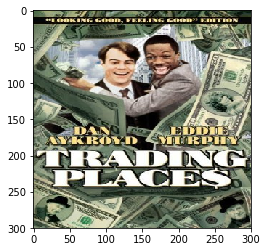

In [6]:
plt.imshow(X[2])

In [7]:
train['Genre'][2]

"['Comedy']"

In [8]:
y = np.array(train.drop(['Id', 'Genre'],axis=1))
y.shape

(7254, 25)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.1)

In [69]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(300,300,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(25, activation='sigmoid'))

In [70]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 296, 296, 16)      1216      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 148, 148, 16)      0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 148, 148, 16)      0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 144, 144, 32)      12832     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 72, 72, 32)        0         
_________________________________________________________________
dropout_26 (Dropout)         (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 68, 68, 64)        51264     
__________

In [71]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [72]:
model.fit(X_train, y_train, epochs=15, validation_data=(X_test, y_test), batch_size=64)

Train on 6528 samples, validate on 726 samples
Epoch 1/15
6528/6528 [==============================] - ETA: 1:34 - loss: 0.7209 - acc: 0.432 - ETA: 55s - loss: 0.6889 - acc: 0.515 - ETA: 42s - loss: 0.6684 - acc: 0.56 - ETA: 35s - loss: 0.6534 - acc: 0.59 - ETA: 31s - loss: 0.6434 - acc: 0.61 - ETA: 28s - loss: 0.6339 - acc: 0.62 - ETA: 26s - loss: 0.6249 - acc: 0.63 - ETA: 25s - loss: 0.6176 - acc: 0.64 - ETA: 23s - loss: 0.6125 - acc: 0.65 - ETA: 22s - loss: 0.6089 - acc: 0.66 - ETA: 21s - loss: 0.6048 - acc: 0.66 - ETA: 21s - loss: 0.5998 - acc: 0.67 - ETA: 20s - loss: 0.5934 - acc: 0.67 - ETA: 19s - loss: 0.5897 - acc: 0.68 - ETA: 19s - loss: 0.5865 - acc: 0.68 - ETA: 18s - loss: 0.5811 - acc: 0.69 - ETA: 18s - loss: 0.5758 - acc: 0.69 - ETA: 17s - loss: 0.5717 - acc: 0.70 - ETA: 17s - loss: 0.5675 - acc: 0.70 - ETA: 17s - loss: 0.5628 - acc: 0.70 - ETA: 16s - loss: 0.5598 - acc: 0.71 - ETA: 16s - loss: 0.5538 - acc: 0.71 - ETA: 16s - loss: 0.5498 - acc: 0.71 - ETA: 15s - loss: 0.5

6528/6528 [==============================] - ETA: 17s - loss: 0.2756 - acc: 0.90 - ETA: 16s - loss: 0.2756 - acc: 0.89 - ETA: 16s - loss: 0.2756 - acc: 0.90 - ETA: 16s - loss: 0.2747 - acc: 0.90 - ETA: 16s - loss: 0.2706 - acc: 0.90 - ETA: 16s - loss: 0.2703 - acc: 0.90 - ETA: 15s - loss: 0.2740 - acc: 0.90 - ETA: 15s - loss: 0.2721 - acc: 0.90 - ETA: 15s - loss: 0.2719 - acc: 0.90 - ETA: 15s - loss: 0.2704 - acc: 0.90 - ETA: 15s - loss: 0.2686 - acc: 0.90 - ETA: 15s - loss: 0.2686 - acc: 0.90 - ETA: 14s - loss: 0.2702 - acc: 0.90 - ETA: 14s - loss: 0.2696 - acc: 0.90 - ETA: 14s - loss: 0.2686 - acc: 0.90 - ETA: 14s - loss: 0.2684 - acc: 0.90 - ETA: 14s - loss: 0.2688 - acc: 0.90 - ETA: 14s - loss: 0.2693 - acc: 0.90 - ETA: 13s - loss: 0.2694 - acc: 0.90 - ETA: 13s - loss: 0.2690 - acc: 0.90 - ETA: 13s - loss: 0.2693 - acc: 0.90 - ETA: 13s - loss: 0.2691 - acc: 0.90 - ETA: 13s - loss: 0.2695 - acc: 0.90 - ETA: 13s - loss: 0.2697 - acc: 0.90 - ETA: 12s - loss: 0.2701 - acc: 0.90 - ETA: 

6528/6528 [==============================] - ETA: 17s - loss: 0.2470 - acc: 0.91 - ETA: 17s - loss: 0.2498 - acc: 0.91 - ETA: 17s - loss: 0.2515 - acc: 0.91 - ETA: 16s - loss: 0.2558 - acc: 0.90 - ETA: 16s - loss: 0.2547 - acc: 0.90 - ETA: 16s - loss: 0.2556 - acc: 0.90 - ETA: 16s - loss: 0.2540 - acc: 0.91 - ETA: 15s - loss: 0.2547 - acc: 0.90 - ETA: 15s - loss: 0.2553 - acc: 0.90 - ETA: 15s - loss: 0.2527 - acc: 0.90 - ETA: 15s - loss: 0.2521 - acc: 0.90 - ETA: 15s - loss: 0.2527 - acc: 0.90 - ETA: 15s - loss: 0.2526 - acc: 0.90 - ETA: 14s - loss: 0.2534 - acc: 0.90 - ETA: 14s - loss: 0.2532 - acc: 0.90 - ETA: 14s - loss: 0.2536 - acc: 0.90 - ETA: 14s - loss: 0.2547 - acc: 0.90 - ETA: 14s - loss: 0.2546 - acc: 0.90 - ETA: 13s - loss: 0.2552 - acc: 0.90 - ETA: 13s - loss: 0.2545 - acc: 0.90 - ETA: 13s - loss: 0.2544 - acc: 0.90 - ETA: 13s - loss: 0.2546 - acc: 0.90 - ETA: 13s - loss: 0.2561 - acc: 0.90 - ETA: 13s - loss: 0.2571 - acc: 0.90 - ETA: 12s - loss: 0.2568 - acc: 0.90 - ETA: 

6528/6528 [==============================] - ETA: 16s - loss: 0.2525 - acc: 0.91 - ETA: 16s - loss: 0.2591 - acc: 0.90 - ETA: 16s - loss: 0.2614 - acc: 0.90 - ETA: 16s - loss: 0.2600 - acc: 0.90 - ETA: 16s - loss: 0.2588 - acc: 0.90 - ETA: 16s - loss: 0.2571 - acc: 0.90 - ETA: 15s - loss: 0.2544 - acc: 0.90 - ETA: 15s - loss: 0.2529 - acc: 0.90 - ETA: 15s - loss: 0.2533 - acc: 0.90 - ETA: 15s - loss: 0.2535 - acc: 0.90 - ETA: 15s - loss: 0.2557 - acc: 0.90 - ETA: 15s - loss: 0.2558 - acc: 0.90 - ETA: 15s - loss: 0.2548 - acc: 0.90 - ETA: 15s - loss: 0.2542 - acc: 0.90 - ETA: 14s - loss: 0.2528 - acc: 0.90 - ETA: 14s - loss: 0.2534 - acc: 0.90 - ETA: 14s - loss: 0.2539 - acc: 0.90 - ETA: 14s - loss: 0.2539 - acc: 0.90 - ETA: 14s - loss: 0.2541 - acc: 0.90 - ETA: 14s - loss: 0.2540 - acc: 0.90 - ETA: 14s - loss: 0.2530 - acc: 0.90 - ETA: 13s - loss: 0.2520 - acc: 0.90 - ETA: 13s - loss: 0.2525 - acc: 0.90 - ETA: 13s - loss: 0.2526 - acc: 0.90 - ETA: 13s - loss: 0.2534 - acc: 0.90 - ETA: 

6528/6528 [==============================] - ETA: 16s - loss: 0.2532 - acc: 0.90 - ETA: 17s - loss: 0.2440 - acc: 0.90 - ETA: 17s - loss: 0.2508 - acc: 0.90 - ETA: 16s - loss: 0.2464 - acc: 0.90 - ETA: 16s - loss: 0.2447 - acc: 0.90 - ETA: 16s - loss: 0.2468 - acc: 0.90 - ETA: 16s - loss: 0.2455 - acc: 0.90 - ETA: 16s - loss: 0.2474 - acc: 0.90 - ETA: 15s - loss: 0.2493 - acc: 0.90 - ETA: 15s - loss: 0.2498 - acc: 0.90 - ETA: 15s - loss: 0.2489 - acc: 0.90 - ETA: 15s - loss: 0.2483 - acc: 0.90 - ETA: 15s - loss: 0.2474 - acc: 0.90 - ETA: 14s - loss: 0.2474 - acc: 0.90 - ETA: 14s - loss: 0.2481 - acc: 0.90 - ETA: 14s - loss: 0.2476 - acc: 0.90 - ETA: 14s - loss: 0.2468 - acc: 0.90 - ETA: 14s - loss: 0.2473 - acc: 0.90 - ETA: 14s - loss: 0.2476 - acc: 0.90 - ETA: 14s - loss: 0.2472 - acc: 0.90 - ETA: 13s - loss: 0.2477 - acc: 0.90 - ETA: 13s - loss: 0.2475 - acc: 0.90 - ETA: 13s - loss: 0.2484 - acc: 0.90 - ETA: 13s - loss: 0.2487 - acc: 0.90 - ETA: 13s - loss: 0.2487 - acc: 0.90 - ETA: 

6528/6528 [==============================] - ETA: 18s - loss: 0.2401 - acc: 0.91 - ETA: 17s - loss: 0.2394 - acc: 0.90 - ETA: 17s - loss: 0.2437 - acc: 0.90 - ETA: 16s - loss: 0.2469 - acc: 0.91 - ETA: 16s - loss: 0.2467 - acc: 0.90 - ETA: 16s - loss: 0.2459 - acc: 0.91 - ETA: 16s - loss: 0.2453 - acc: 0.91 - ETA: 16s - loss: 0.2461 - acc: 0.90 - ETA: 16s - loss: 0.2462 - acc: 0.91 - ETA: 15s - loss: 0.2456 - acc: 0.91 - ETA: 15s - loss: 0.2466 - acc: 0.90 - ETA: 15s - loss: 0.2461 - acc: 0.90 - ETA: 15s - loss: 0.2447 - acc: 0.91 - ETA: 15s - loss: 0.2444 - acc: 0.91 - ETA: 15s - loss: 0.2443 - acc: 0.91 - ETA: 15s - loss: 0.2445 - acc: 0.91 - ETA: 14s - loss: 0.2440 - acc: 0.91 - ETA: 14s - loss: 0.2443 - acc: 0.91 - ETA: 14s - loss: 0.2444 - acc: 0.91 - ETA: 14s - loss: 0.2448 - acc: 0.91 - ETA: 14s - loss: 0.2441 - acc: 0.91 - ETA: 13s - loss: 0.2436 - acc: 0.91 - ETA: 13s - loss: 0.2427 - acc: 0.91 - ETA: 13s - loss: 0.2428 - acc: 0.91 - ETA: 13s - loss: 0.2426 - acc: 0.91 - ETA: 

6528/6528 [==============================] - ETA: 16s - loss: 0.2375 - acc: 0.90 - ETA: 16s - loss: 0.2424 - acc: 0.90 - ETA: 16s - loss: 0.2411 - acc: 0.91 - ETA: 16s - loss: 0.2429 - acc: 0.90 - ETA: 16s - loss: 0.2440 - acc: 0.91 - ETA: 16s - loss: 0.2445 - acc: 0.90 - ETA: 15s - loss: 0.2448 - acc: 0.91 - ETA: 15s - loss: 0.2437 - acc: 0.91 - ETA: 15s - loss: 0.2444 - acc: 0.90 - ETA: 15s - loss: 0.2453 - acc: 0.90 - ETA: 15s - loss: 0.2460 - acc: 0.90 - ETA: 15s - loss: 0.2457 - acc: 0.90 - ETA: 14s - loss: 0.2457 - acc: 0.90 - ETA: 14s - loss: 0.2471 - acc: 0.90 - ETA: 14s - loss: 0.2465 - acc: 0.90 - ETA: 14s - loss: 0.2464 - acc: 0.90 - ETA: 14s - loss: 0.2472 - acc: 0.90 - ETA: 14s - loss: 0.2473 - acc: 0.90 - ETA: 14s - loss: 0.2474 - acc: 0.90 - ETA: 13s - loss: 0.2479 - acc: 0.90 - ETA: 13s - loss: 0.2474 - acc: 0.90 - ETA: 13s - loss: 0.2468 - acc: 0.90 - ETA: 13s - loss: 0.2464 - acc: 0.90 - ETA: 13s - loss: 0.2468 - acc: 0.90 - ETA: 13s - loss: 0.2465 - acc: 0.90 - ETA: 

6528/6528 [==============================] - ETA: 16s - loss: 0.2359 - acc: 0.91 - ETA: 16s - loss: 0.2361 - acc: 0.91 - ETA: 16s - loss: 0.2302 - acc: 0.91 - ETA: 16s - loss: 0.2324 - acc: 0.91 - ETA: 16s - loss: 0.2384 - acc: 0.91 - ETA: 16s - loss: 0.2376 - acc: 0.91 - ETA: 16s - loss: 0.2389 - acc: 0.91 - ETA: 15s - loss: 0.2390 - acc: 0.91 - ETA: 15s - loss: 0.2377 - acc: 0.91 - ETA: 15s - loss: 0.2385 - acc: 0.91 - ETA: 15s - loss: 0.2371 - acc: 0.91 - ETA: 15s - loss: 0.2387 - acc: 0.91 - ETA: 15s - loss: 0.2381 - acc: 0.91 - ETA: 14s - loss: 0.2383 - acc: 0.91 - ETA: 14s - loss: 0.2369 - acc: 0.91 - ETA: 14s - loss: 0.2374 - acc: 0.91 - ETA: 14s - loss: 0.2378 - acc: 0.91 - ETA: 14s - loss: 0.2388 - acc: 0.91 - ETA: 13s - loss: 0.2374 - acc: 0.91 - ETA: 13s - loss: 0.2386 - acc: 0.91 - ETA: 13s - loss: 0.2382 - acc: 0.91 - ETA: 13s - loss: 0.2384 - acc: 0.91 - ETA: 13s - loss: 0.2388 - acc: 0.91 - ETA: 13s - loss: 0.2395 - acc: 0.90 - ETA: 12s - loss: 0.2404 - acc: 0.90 - ETA: 

Drama (0.505)
Action (0.246)
Thriller (0.239)


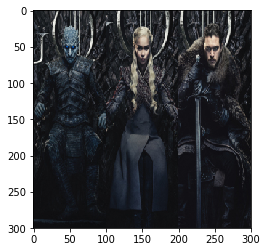

In [73]:
img = image.load_img('GOT.jpg',target_size=(300,300,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,300,300,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [74]:
img = image.load_img('avengers.jpeg',target_size=(300,300,3))
img = image.img_to_array(img)
img = img/255

Drama (0.507)
Action (0.261)
Thriller (0.239)


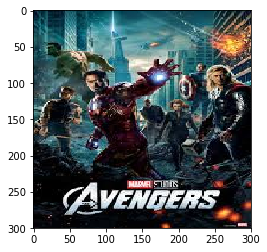

In [75]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,300,300,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [76]:
img = image.load_img('IT.jpg',target_size=(300,300,3))
img = image.img_to_array(img)
img = img/255

Drama (0.502)
Action (0.248)
Thriller (0.243)


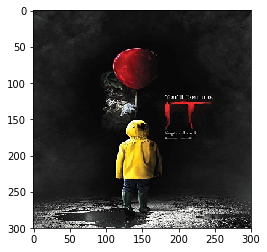

In [77]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,300,300,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [78]:
img = image.load_img('IT2.jpg',target_size=(300,300,3))
img = image.img_to_array(img)
img = img/255

Drama (0.505)
Action (0.252)
Thriller (0.242)


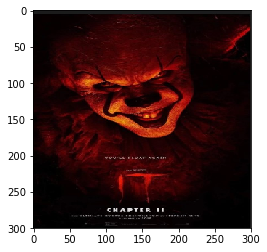

In [79]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,300,300,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [80]:
img = image.load_img('TS4.jpg',target_size=(300,300,3))
img = image.img_to_array(img)
img = img/255

Drama (0.516)
Comedy (0.276)
Action (0.236)


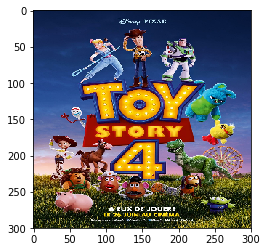

In [81]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,300,300,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [82]:
img = image.load_img('Rec.jpg',target_size=(300,300,3))
img = image.img_to_array(img)
img = img/255

Drama (0.505)
Action (0.251)
Thriller (0.243)


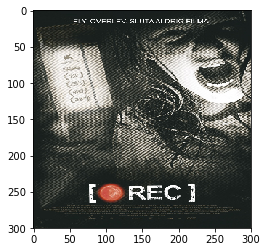

In [83]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,300,300,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [84]:
img = image.load_img('Grudge.jpg',target_size=(300,300,3))
img = image.img_to_array(img)
img = img/255

Drama (0.501)
Thriller (0.243)
Action (0.242)


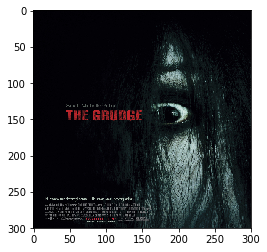

In [85]:
classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,300,300,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [11]:
model = keras.models.load_model("Trained_model")

Drama (0.508)
Comedy (0.388)
Action (0.182)


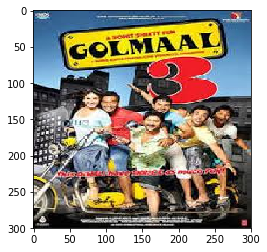

In [86]:
img = image.load_img('golmal.jpeg',target_size=(300,300,3))
img = image.img_to_array(img)
img = img/255

classes = np.array(train.columns[2:])
proba = model.predict(img.reshape(1,300,300,3))
top_3 = np.argsort(proba[0])[:-4:-1]
for i in range(3):
    print("{}".format(classes[top_3[i]])+" ({:.3})".format(proba[0][top_3[i]]))
plt.imshow(img)

In [87]:
model.save("Trained_model_ver2")